In [2]:
#DB Connection 
import pymssql
import pandas as pd
import pyodbc
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=Martin-PC\SQLEXPRESS;"
                     "Database=FootballData;"
                     "Trusted_Connection=yes;")
#conn = pymssql.connect(server="localhost", user="",password="", port=63642)  # You can lookup the port number inside SQL server. 



In [3]:
#Matches select
stmt = "SELECT * FROM Matches"
# Excute Query here
df_matches = pd.read_sql(stmt,conn)
print(df_matches.shape)
df_matches.head(3)

(1137, 10)


,Id,ExternalId,Date,Country,League,Season,Stage,Player_Id,AwayTeam_Id,HomeTeam_Id
0,1,2522744,2017-08-13 11:00:00,England,Premier League,2017/2018,1,None,10,9
1,2,2522745,2017-08-13 11:00:00,England,Premier League,2017/2018,1,None,12,11
2,3,2522743,2017-08-13 11:00:00,England,Premier League,2017/2018,1,None,18,17


In [17]:
#Corners select
stmt = "SELECT * FROM Corners"
# Excute Query here
df_corners = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_corners.shape)
df_corners.head()

(11478, 6)


,Id,ExternalId,MatchId,Minute,Player1,TeamId
0,1,6936832,2522744,6,None,8456
1,2,6936849,2522744,7,None,8456
2,3,6934904,2522745,19,None,8191
3,4,6934741,2522746,7,None,9796
4,5,6936951,2522744,14,None,8456


In [18]:
#Goals select
stmt = "SELECT * FROM Goals"
# Excute Query here
df_goals = pd.read_sql(stmt,conn)
print(df_goals.shape)
df_goals.head()

(3147, 8)


,Id,MatchId,ExternalId,Minute,ScorerId,AssistId,Type,TeamId
0,1,2522743,6933185,2,169193,339992,header,9825
1,2,2522745,6934987,24,46898,183715,shot,8191
2,3,2522744,6937964,70,37412,37459,shot,8456
3,4,2522745,6935245,39,33138,46008,shot,8191
4,5,2522746,6934998,23,146830,None,None,9826


In [9]:
#Teams select
stmt = "SELECT DISTINCT * FROM Teams"
# Excute Query here
df_teams = pd.read_sql(stmt,conn)
print(df_teams.shape)
#df_teams.head()
df_teams.count

(2294, 4)


<bound method DataFrame.count of         Id ExternalId              FullName Acronym
0        1       9826        Crystal Palace     CRY
1        2       9825               Arsenal     ARS
2        3      10204              Brighton     BHA
3        4       8455               Chelsea     CHE
4        5       8456       Manchester City     MCI
5        6       8191               Burnley     BUR
6        7       8197             Leicester     LEI
7        8       9796          Huddersfield     HUD
8        9      10204              Brighton     BHA
9       10       8456       Manchester City     MCI
10      11       8455               Chelsea     CHE
11      12       8191               Burnley     BUR
12      13       8668               Everton     EVE
13      14      10260     Manchester United     MUN
14      15      10194                 Stoke     STK
15      16       8654              West Ham     WHU
16      17       9825               Arsenal     ARS
17      18       8197          

(1524, 3)
10003


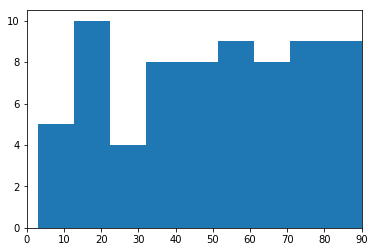

10194


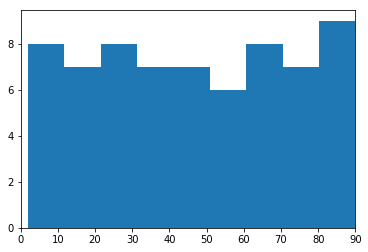

10204


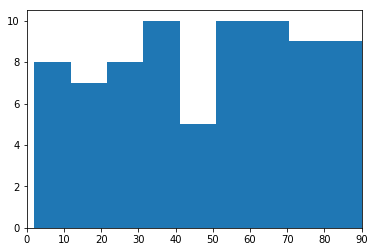

10260


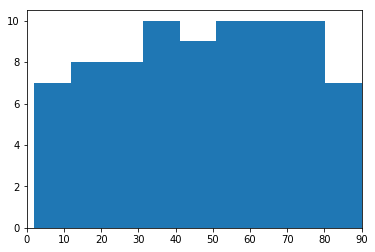

10261


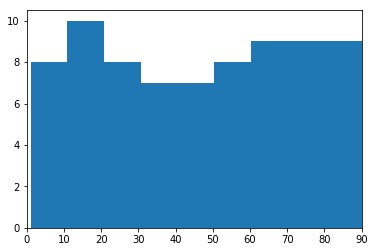

8191


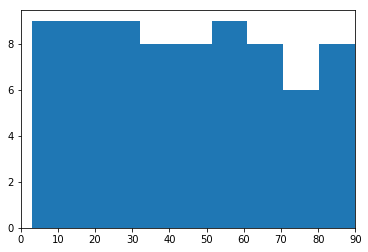

8197


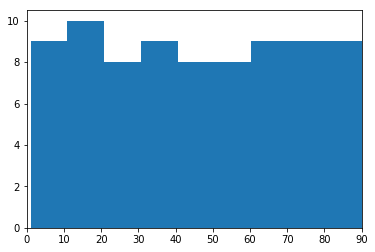

8455


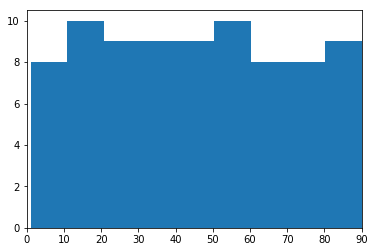

8456


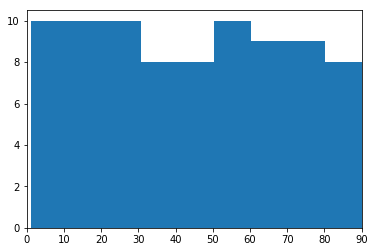

8466


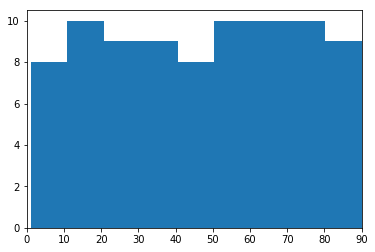

8586


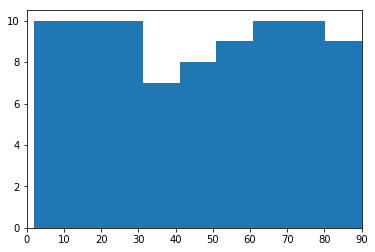

8650


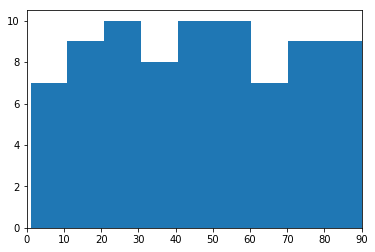

8654


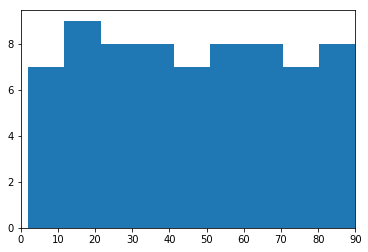

8659


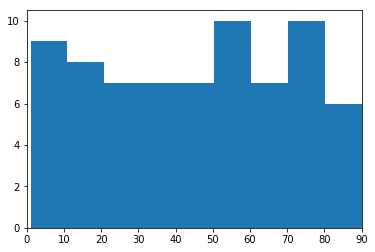

8668


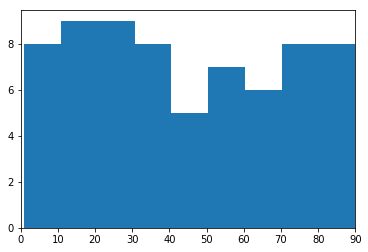

8678


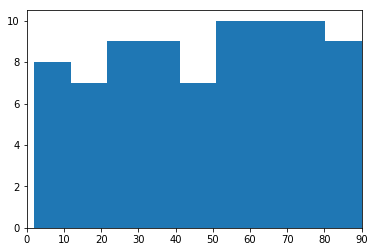

9796


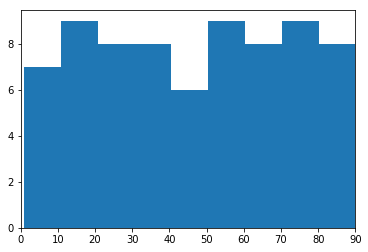

9817


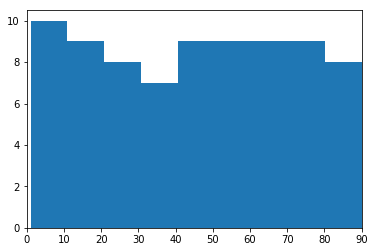

9825


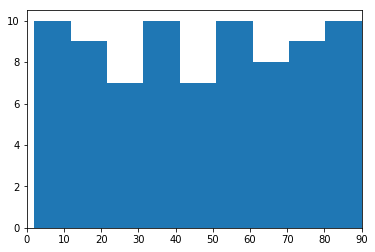

9826


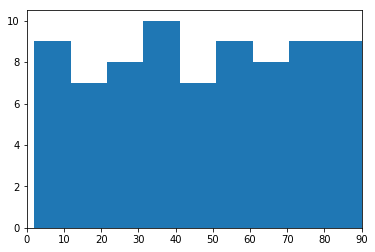

In [4]:
#Teams select
stmt = """SELECT  TeamId, convert (bigint, minute  ) as Minute, count(*) as count
  FROM [FootballData].[dbo].[Corners]
  group by convert (bigint, minute  ),TeamId
  order by 1,2"""
# Excute Query here
df_teams_corners_per_minute = pd.read_sql(stmt,conn)
print(df_teams_corners_per_minute.shape)
#df_teams_corners_per_minute.head()
groups = df_teams_corners_per_minute.groupby(['TeamId'])
df_teams_corners_per_minute.describe()
import matplotlib.pyplot as plt
for group in groups:
    #figure()
    #plt.
    print(group[1].TeamId.values[0])
    plt.hist(group[1].Minute, bins=9)
    #cumulative=1, density=True, histtype='step'
    axes = plt.gca()
    axes.set_xlim([0,90])
    #axes.set_ylim([0,50])
    plt.show()
   
#hist = df_teams_corners_per_minute.hist(by='Minute')
##
#df_teams_corners_per_minute['Minute'].hist(by=df_teams_corners_per_minute['count'])
  

#for group in df_teams_corners_per_minute.groupby(['TeamId']).groups:

# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.pyplot as plt
# df_teams_corners_per_minute.plot.hist()
# plt.show()
# plt.hist(df_teams_corners_per_minute, bins='auto')  # arguments are passed to np.histogram
# plt.title("Histogram with 'auto' bins")
# plt.show()
# for team in df_teams_corners_per_minute.groupby(['TeamId']).groups.values:
#     team.hist()

In [6]:
hist = df_corners.groupby(['Minute','TeamId']).head(10).hist(color='k', alpha=0.5, bins=3)


NameError: name 'df_corners' is not defined

In [95]:
goals = pd.merge(df_goals.set_index("MatchId"), df_matches.set_index("ExternalId"), how='left')
#result = goals[goals['Minute'].notnull()]
print(result.shape)
premier_league = goals[(goals['League'] == 'Premier League') & (goals['Season'] == '2016/2017')]
premier_league.head()

premier_league['Minute'] = premier_league['Minute'].astype(int)
#premier_league.loc[premier_league['Minute']] = premier_league['Minute'].astype(int)

for number in range(0, 90, 10):
    from_minute = number
    to_minute = number + 10
    goals = premier_league.groupby(['TeamId'])['Minute'].apply(lambda x: len(x.where(lambda y : y > from_minute).where(lambda z:z < to_minute).dropna()))   
    print(goals)
#goals_teams = goa
#len(teams.groups)

(30029, 13)


C:\Users\martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


TeamId
10003    0
10172    1
10194    0
10252    1
10260    1
10261    0
8191     1
8197     1
8455     4
8456     3
8466     1
8472     2
8586     3
8650     0
8654     2
8659     2
8667     0
8668     3
8678     1
9817     0
9825     1
9826     0
9850     0
Name: Minute, dtype: int64
TeamId
10003    1
10172    1
10194    3
10252    0
10260    3
10261    0
8191     0
8197     5
8455     1
8456     2
8466     5
8472     1
8586     3
8650     0
8654     1
8659     0
8667     2
8668     2
8678     0
9817     1
9825     3
9826     1
9850     0
Name: Minute, dtype: int64
TeamId
10003    1
10172    0
10194    3
10252    0
10260    3
10261    2
8191     0
8197     1
8455     2
8456     4
8466     2
8472     2
8586     2
8650     2
8654     1
8659     0
8667     0
8668     1
8678     0
9817     0
9825     0
9826     1
9850     0
Name: Minute, dtype: int64
TeamId
10003    2
10172    0
10194    1
10252    2
10260    1
10261    0
8191     1
8197     1
8455     1
8456     4
8466     5
8472     0


In [96]:
result = pd.merge(df_corners.set_index("MatchId"), df_matches.set_index("ExternalId"), how='left')
#premier_league = result[(result['Season']  == '2017/2018') & (result['League']  == 'Premier League')]
premier_league = result[ (result['Season'] == '2017/2018') & (result['League'] == 'Ligue 1')]
print(result.shape)

df_goals.head()
teams_coreners = df_corners.groupby('TeamId')
goal_matches = pd.merge(df_corners.set_index("MatchId"), df_matches.set_index("ExternalId"), how='right')

goal_matches_home_team = pd.merge(goal_matches.set_index("HomeTeam_Id"), df_teams.set_index("ExternalId"), how='left')
goal_matches_home_team.rename(columns={'FullName': 'FullNameHome'}, inplace=True)
goal_matches_home_team.rename(columns={'Acronym': 'AcronymHome'}, inplace=True)
goal_matches_home_team.rename(columns={'TeamId': 'HomeTeamId'}, inplace=True)
goal_matches_home_team_away_team = pd.merge(goal_matches_home_team.set_index("AwayTeam_Id"), df_teams.set_index("ExternalId"), how='left')
#goal_matches_home_team_away_team
#goal_matches_home_team

goal_matches_home_team_away_team
#['Minute','TeamId'].apply(
#    lambda x: "{%s}" % ', '.join(x.Minute + ' ' + x.TeamId))
#minutes_sum = result.groupby(['TeamId'], as_index=True)['Minute']hg
#minutes_sum
#['Minute']
#minutes_sum = df_corners.groupby('MatchId')['MatchId', 'TeamId','Minute']
#print(premier_league[:10].head())
#print(result_premier_league_1718)
#premier_league_minutes = premier_league[premier_league['Minute'].notnull()]
#print(premier_league_minutes.shape)
#minutes_sum.first()
#print(list(premier_league_minutes.columns.values))

(30029, 13)


,Id,ExternalId,Minute,Player1,HomeTeamId,Date,Country,League,Season,Stage,Player_Id,FullNameHome,AcronymHome,FullName,Acronym
0,1,3652595,5,None,8455,2014-08-18 15:00:00,England,Premier League,2014/2015,1,None,Liverpool,SOU,Liverpool,SOU
1,2,3647429,15,None,9825,2014-08-18 15:00:00,England,Premier League,2014/2015,1,None,Burnley,CHE,Burnley,CHE
2,3,3649357,9,None,8650,2014-08-18 15:00:00,England,Premier League,2014/2015,1,None,Leicester,EVE,Leicester,EVE
3,4,3645873,16,None,8197,2014-08-18 15:00:00,England,Premier League,2014/2015,1,None,Arsenal,CRY,Arsenal,CRY
4,5,3647542,30,None,9825,2014-08-18 15:00:00,England,Premier League,2014/2015,1,None,Everton,LEI,Everton,LEI
5,6,3645920,20,None,8668,2014-08-18 15:00:00,England,Premier League,2014/2015,1,None,Chelsea,BUR,Chelsea,BUR
6,7,3649428,22,None,8466,2014-08-18 15:00:00,England,Premier League,2014/2015,1,None,Crystal Palace,ARS,Crystal Palace,ARS
7,8,3652617,11,None,8455,2014-08-18 15:00:00,England,Premier League,2014/2015,1,None,Southampton,LIV,Southampton,LIV
8,9,3647566,35,None,9826,2014-08-18 15:00:00,England,Premier League,2014/2015,1,None,Arsenal,CRY,Arsenal,CRY
9,10,3649444,28,None,8650,2014-11-03 15:00:00,England,Premier League,2014/2015,10,None,Leicester,EVE,Leicester,EVE


In [107]:
goals = pd.merge(df_goals.set_index("MatchId"), df_matches.set_index("ExternalId"), how='left')
#result = goals[goals['Minute'].notnull()]
print(result.shape)
premier_league = goals[(goals['League'] == 'Premier League') & (goals['Season'] == '2016/2017')]
premier_league.head()

premier_league['Minute'] = premier_league['Minute'].astype(int)
#premier_league.loc[premier_league['Minute']] = premier_league['Minute'].astype(int)

premier_league['TeamId'].hist(by=premier_league['Minute'])

# for number in range(0, 90, 10):
#     from_minute = number
#     to_minute = number + 10
#     goals = premier_league.groupby(['TeamId'])['Minute'].apply(lambda x: len(x.where(lambda y : y > from_minute).where(lambda z:z < to_minute).dropna()))   
#     print(goals)
# #goals_teams = goa
# #len(teams.groups)

#print(teams.groups.keys())

(30029, 13)


C:\Users\martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006CD266B8D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000006CD2ABCE80>]], dtype=object)

In [83]:
#groups = df_goals.groupby(['MatchId'])
#groups.groups.keys()
#df_goals.head()
minutes_sum = df_goals.groupby(['MatchId', 'TeamId',], as_index=True, sort=True)['Minute']
#minutes_sum.last()
minutes_sum.first()

#print(minutes_sum.shape)
#df_goals.head(10)
#groups.groups['1709877']
#minutes_sum.groups
#result = minutes_sum.get_group(('1709702','9748'))

MatchId  TeamId
1709697  9837      22
         9847       7
1709698  7794       9
         8592      12
1709699  7819      12
1709700  9853      39
1709702  9748      64
1709703  8689      10
         9829      78
1709704  9827      17
1709705  9830      65
1709706  9831      23
         9941      45
1709707  9827      48
         9829      45
1709708  8639      69
1709709  9747      90
1709711  10249     19
1709712  8550      12
         9830       3
1709713  9847      26
1709714  4087      35
         9851       7
1709715  9853      27
1709716  9941      10
1709717  7794      24
1709719  8592      46
1709720  8639      58
1709721  8588      11
1709722  10249     44
                   ..
2525452  8592       2
         9747      42
2525453  8639      18
         9836      11
2525454  9829      90
2525455  10242     31
         10249     58
2525456  7819      76
         9831       3
2525457  9851      52
2525458  9748      50
         9848      22
2525460  8121      22
         9836   